In [71]:
import numpy as np
import pandas as pd
labelsFarmacos = ["Presion","Azucar","Indice", "Alergia", 'Otras', 'Administrar']

In [72]:
farmacos_data = pd.read_csv("farmacos.csv",index_col=0)
weather_data = pd.read_csv("weather.csv",index_col=0)

In [73]:
farmacos_data.head()

,Presion,Azucar,Indice,Alergia,Otras,Administrar
Paciente,,,,,,
1,Alta,Alto,Alto,No,No,Si
2,Alta,Alto,Alto,Si,No,Si
3,Baja,Alto,Bajo,No,No,Si
4,Media,Alto,Alto,No,Si,No
5,Media,Bajo,Alto,Si,Si,No


In [74]:
weather_data.head()

,Tiempo,Temperatura,Humedad,Viento,Juega
Ejemplo,,,,,
1,Soleado,Alta,Alta,No,N
2,Soleado,Alta,Alta,Si,N
3,Nubloso,Alta,Alta,No,P
4,Lluvioso,Media,Alta,No,P
5,Lluvioso,Media,Normal,No,P


In [76]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

le = preprocessing.LabelEncoder()



for v in labelsFarmacos:
  le.fit(farmacos_data[v])
  data[v] = le.transform(farmacos_data[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

t_data,t_respuesta,clf

(    Presion  Azucar  Indice  Alergia
 0         0       0       0        0
 1         0       0       0        1
 2         1       0       1        0
 3         2       0       0        0
 4         2       1       0        1
 5         1       1       0        1
 6         0       1       0        1
 7         0       1       1        0
 8         0       0       1        1
 9         1       1       0        1
 10        2       1       1        1
 11        0       1       0        1
 12        1       0       0        1
 13        1       0       1        0,
 0     0
 1     0
 2     0
 3     1
 4     1
 5     1
 6     0
 7     1
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: Otras, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))

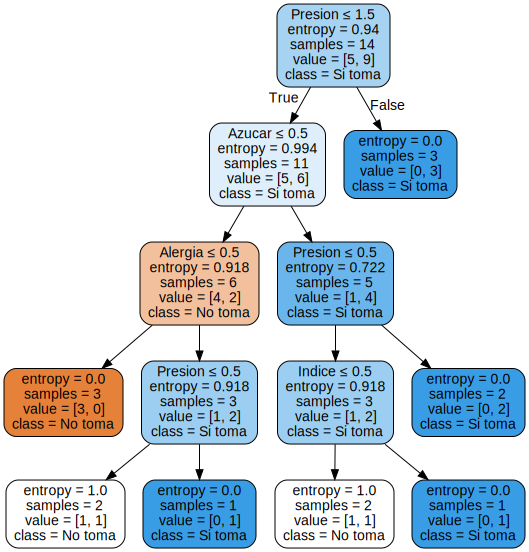

In [53]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["No toma","Si toma"],
                                filled = True, rounded = True, special_characters = True)
                              
graph = graphviz.Source(dot_data)
graph

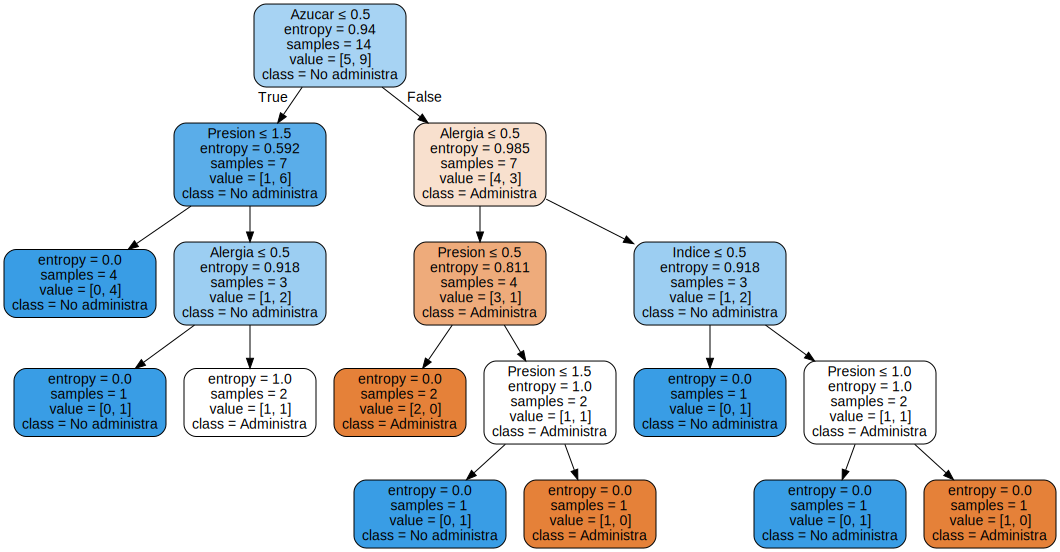

In [54]:
import pandas as pd
import numpy as np
from sklearn import tree
#from sklearn import preprocessing

data = farmacos_data.copy()

data["Presion"] = np.where(data["Presion"] == "Alta",2,
                        np.where(data["Presion"] == "Media",1,0))

data["Azucar"] = np.where(data["Azucar"] == "Alto",1,0)

data["Indice"] = np.where(data["Indice"] == "Alto",1,0)
data["Alergia"] = np.where(data["Alergia"] == "Si",1,0)
data["Otras"] = np.where(data["Otras"] == "Si",1,0)
#data["Administrar"] = np.where(data["Administrar"] == "Si",1,0)

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = list(t_data.columns.values),
                                class_names = ["Administra","No administra"],
                                filled = True, rounded = True, special_characters = True)
                              
graph = graphviz.Source(dot_data)
graph

In [60]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing

farmcos_test = pd.read_csv("farmacosTest.csv", index_col=0)


data = pd.DataFrame()
data_test = pd.DataFrame()

le = preprocessing.LabelEncoder()


for v in labelsFarmacos:
  le.fit(farmcos_test[v])
  data[v] = le.transform(farmcos_test[v])
  data_test[v] = le.transform(farmcos_test[v])

#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data[data.columns[0:4]]
t_respuesta = data[data.columns[4]]
x_test = data_test[data_test.columns[0:4]]


#crear el modelo
clf = clf.fit(t_data, t_respuesta)
y_respuesta = clf.predict(x_test)
t_data, t_respuesta, y_respuesta

(   Presion  Azucar  Indice  Alergia
 0        0       0       0        0
 1        0       0       0        1
 2        1       0       1        0,
 0    0
 1    0
 2    0
 Name: Otras, dtype: int32,
 array([0, 0, 0]))

In [61]:
#calcular la entropia
def calcular_entropia(p):
  return -np.sum(p*np.log2(p))

#contar las clases de la caracteristica
valores, cuantos = np.unique(farmacos_data['Administrar'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.863120568566631


(array(['No', 'Si'], dtype=object), array([ 4, 10], dtype=int64))

In [65]:
#calcular la ganancia
def calcular_ganancia(valores, var = 'Presion'):

  valores, cuantos = np.unique(farmacos_data[var], return_counts=True)

  info_a = []

  for e in valores:
    se = np.where(farmacos_data[var]==e)
    print("subconjunto",se)

    se_administra = farmacos_data['Administrar'][farmacos_data.index[se[0]]]
    print("Ejemplos del valor", se_administra)

    v_se_administra, c_se_quemadura = np.unique(se_administra,return_counts=True)
    print("subgrupos",v_se_administra,c_se_quemadura)

    #entropia del valor
    se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
    print("entropia del valor",se_entropia)

    #probabilidad del valor
    se_size = sum(c_se_quemadura)/len(farmacos_data.index)
    print("probabilidad",se_size)

    info_a += [[se_entropia, se_size]]
    print("info_a",info_a)

  info_a = np.array(info_a)

  #calcular la entropia de la variable
  info_g = np.sum(info_a[:,0]*info_a[:,1])
  print("entropia de la variable",info_g)
  return info_g

info_a = calcular_ganancia(valores, var = 'Presion')
ganancia = entropia -info_a
print("ganancia de presion", ganancia)

subconjunto (array([ 0,  1,  6,  7,  8, 11], dtype=int64),)
Ejemplos del valor Paciente
1     Si
2     Si
7     Si
8     Si
9     No
12    No
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [2 4]
entropia del valor 0.9182958340544896
probabilidad 0.42857142857142855
info_a [[0.9182958340544896, 0.42857142857142855]]
subconjunto (array([ 2,  5,  9, 12, 13], dtype=int64),)
Ejemplos del valor Paciente
3     Si
6     Si
10    Si
13    Si
14    Si
Name: Administrar, dtype: object
subgrupos ['Si'] [5]
entropia del valor 0.0
probabilidad 0.35714285714285715
info_a [[0.9182958340544896, 0.42857142857142855], [0.0, 0.35714285714285715]]
subconjunto (array([ 3,  4, 10], dtype=int64),)
Ejemplos del valor Paciente
4     No
5     No
11    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [2 1]
entropia del valor 0.9182958340544896
probabilidad 0.21428571428571427
info_a [[0.9182958340544896, 0.42857142857142855], [0.0, 0.35714285714285715], [0.9182958340544896, 0.21428571428571427]]


In [66]:
info_a = calcular_ganancia(valores, var = 'Azucar')
ganancia = entropia -info_a
print("ganancia de altura", ganancia)

subconjunto (array([ 0,  1,  2,  3,  8, 12, 13], dtype=int64),)
Ejemplos del valor Paciente
1     Si
2     Si
3     Si
4     No
9     No
13    Si
14    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [2 5]
entropia del valor 0.863120568566631
probabilidad 0.5
info_a [[0.863120568566631, 0.5]]
subconjunto (array([ 4,  5,  6,  7,  9, 10, 11], dtype=int64),)
Ejemplos del valor Paciente
5     No
6     Si
7     Si
8     Si
10    Si
11    Si
12    No
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [2 5]
entropia del valor 0.863120568566631
probabilidad 0.5
info_a [[0.863120568566631, 0.5], [0.863120568566631, 0.5]]
entropia de la variable 0.863120568566631
ganancia de altura 0.0


In [67]:
info_a = calcular_ganancia(valores, var = 'Indice')
ganancia = entropia -info_a
print("ganancia de peso", ganancia)

subconjunto (array([ 0,  1,  3,  4,  5,  6,  9, 11, 12], dtype=int64),)
Ejemplos del valor Paciente
1     Si
2     Si
4     No
5     No
6     Si
7     Si
10    Si
12    No
13    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [3 6]
entropia del valor 0.9182958340544896
probabilidad 0.6428571428571429
info_a [[0.9182958340544896, 0.6428571428571429]]
subconjunto (array([ 2,  7,  8, 10, 13], dtype=int64),)
Ejemplos del valor Paciente
3     Si
8     Si
9     No
11    Si
14    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [1 4]
entropia del valor 0.7219280948873623
probabilidad 0.35714285714285715
info_a [[0.9182958340544896, 0.6428571428571429], [0.7219280948873623, 0.35714285714285715]]
entropia de la variable 0.8481644986376585
ganancia de peso 0.01495606992897247


In [69]:
info_a = calcular_ganancia(valores, var = 'Alergia')
ganancia = entropia -info_a
print("ganancia de Alergia", ganancia)

subconjunto (array([ 0,  2,  3,  7, 13], dtype=int64),)
Ejemplos del valor Paciente
1     Si
3     Si
4     No
8     Si
14    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [1 4]
entropia del valor 0.7219280948873623
probabilidad 0.35714285714285715
info_a [[0.7219280948873623, 0.35714285714285715]]
subconjunto (array([ 1,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64),)
Ejemplos del valor Paciente
2     Si
5     No
6     Si
7     Si
9     No
10    Si
11    Si
12    No
13    Si
Name: Administrar, dtype: object
subgrupos ['No' 'Si'] [3 6]
entropia del valor 0.9182958340544896
probabilidad 0.6428571428571429
info_a [[0.7219280948873623, 0.35714285714285715], [0.9182958340544896, 0.6428571428571429]]
entropia de la variable 0.8481644986376585
ganancia de Alergia 0.01495606992897247


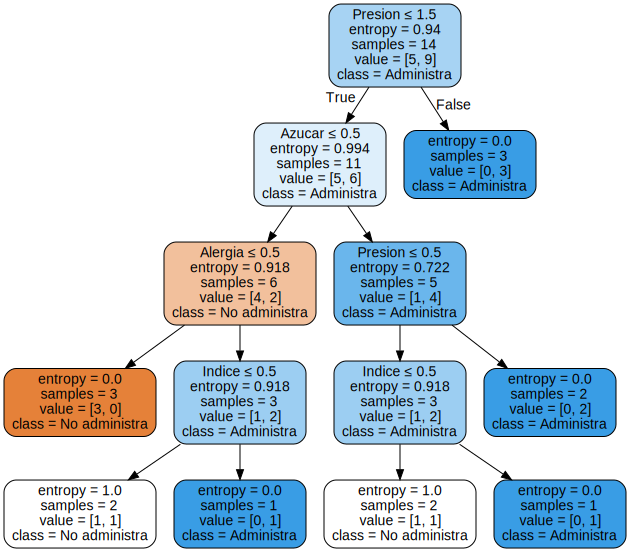

In [70]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

for v in labelsFarmacos:
    le.fit(farmacos_data[v])
    data[v] = le.transform(farmacos_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

# Visualize tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["No administra", "Administra"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
data = farmacos_data.copy()

data["Pelo"] = np.where(data["Pelo"]=="rubio", 2, 
                          np.where(data["Pelo"]=="moreno", 1, 0))

data["Altura"] = np.where(data["Altura"]=="medio", 2, 
                               np.where(data["Altura"]=="alto", 1, 0))

data["Peso"] = np.where(data["Peso"]=="bajo", 2,
                        np.where(data["Peso"]=="medio",1,0))

data["Proteccion"] = np.where(data["Proteccion"]=="no", 0, 1)
    
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["Don't Play", "Play"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]

for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
t_data,t_target,clf

In [ ]:
from sklearn import tree
from sklearn import preprocessing

quemadura_test = pd.read_csv("arbQuemaduraTest.csv",index_col=0)
data = pd.DataFrame()
data1 = pd.DataFrame()
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = ["Pelo", "Altura", "Peso", "Proteccion", "Quemadura"]
for v in var:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])
    data1[v] = le.transform(quemadura_test[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
X_test = data1[data1.columns[0:4]]
y_pred = clf.predict(X_test)
y_pred
